In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.feature_extraction import FeatureHasher


In [2]:
import os
working_directory = os.getcwd()
print(working_directory)

/content


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
path = r'/content/gdrive/MyDrive/Colab Notebooks/Keystone Project/BankChurners.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [8]:
df.shape

(10127, 23)

In [9]:
#checking null values

df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [10]:
# check for data duplication
df.duplicated().sum()

0

In [11]:
# check the proportion of 'unknown' value
round(df.apply(lambda x: sum(x=='Unknown') / len(df)), 3)

CLIENTNUM                                                                                                                             0.000
Attrition_Flag                                                                                                                        0.000
Customer_Age                                                                                                                          0.000
Gender                                                                                                                                0.000
Dependent_count                                                                                                                       0.000
Education_Level                                                                                                                       0.150
Marital_Status                                                                                                                        0.074
Income_Category     

Fortunately, there is no null values or duplicated records can be found in the dataset. We can say that the data is clean. however, we can see 'Unknown' (string) values in Education_Level, Marital_Status,and Income_Category features.  
Note: But it is necessary to alter the 'Unknown' string in the data preparation step before running the model for a better score.

In [12]:
1 + 3.322 * np.log(10127)

31.638674459869854

In [13]:
df.columns.tolist()

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [14]:
df.isnull().any().sum()

0

EDA

1. CLIENTNUM : client number is user id.

In [15]:
print('This bank has {} users'.format(df['CLIENTNUM'].nunique()))

This bank has 10127 users


2. Attrition_Flag : This column is client churn, Existing Customer - Stay, Attrited Customer - Churn.

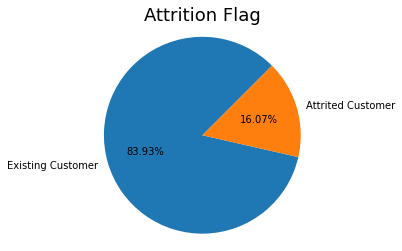

In [16]:
fig, ax = plt.subplots()
ax.pie(df['Attrition_Flag'].value_counts().values, labels = df['Attrition_Flag'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Attrition Flag', loc = 'center', fontsize = 18)
plt.show()

This is imbalanced problem, clients who left credit card services are around 16.07%.

# data is severly imbalanced so we will apply SMOTE to balance it before running the model

3. Customer_Age

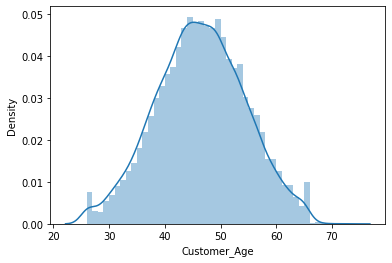

In [17]:
sns.distplot(df['Customer_Age'])

In [18]:
print('The youngest customer is {} year old'.format(df['Customer_Age'].min()),
      'The oldest customer is {} year old'.format(df['Customer_Age'].max()),
      'The average customer age is {:.2f} year old'.format(df['Customer_Age'].mean()),
     sep = '\n'
     )

The youngest customer is 26 year old
The oldest customer is 73 year old
The average customer age is 46.33 year old


The age of customers is normally distributed. As shown by most of the customers' age clustered around the mean value. (between 40 to 60). Thus, further use of the age feature can be done with the normality assumption

4. Gender

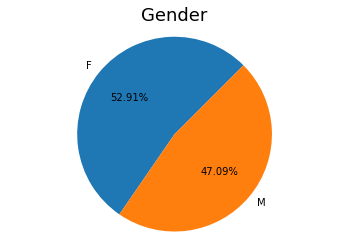

In [19]:
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Gender', loc = 'center', fontsize = 18)
plt.show()

Client genders are almost equal with female-53% and male-47%.

Based on the pie chart, we can see that the population of Female group is slightly bigger than Male group. moreover churning probablity in female customer also show slightly higher than male customer.

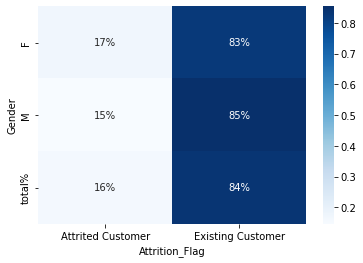

In [20]:
# Attrition proportion between genders to see the probability of churning  in each gender category
cross = pd.crosstab(df['Gender'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

Based on the pie chart, we can see that the population of Female group is slightly bigger than Male group. moreover churning probablity in female customer also show slightly higher than male customer.

5. Dependent_count : The number of dependent.

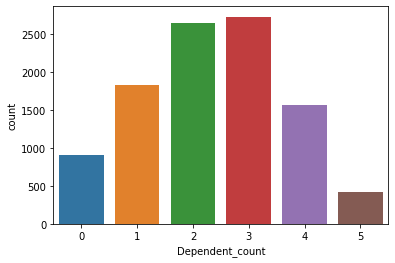

In [22]:
sns.countplot(x=df['Dependent_count'])

6. Education_Level : Customer's education.

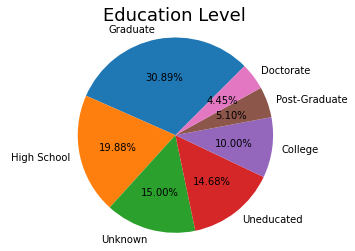

In [23]:
fig, ax = plt.subplots()
ax.pie(df['Education_Level'].value_counts().values, labels = df['Education_Level'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Education Level', loc = 'center', fontsize = 18)
plt.show()

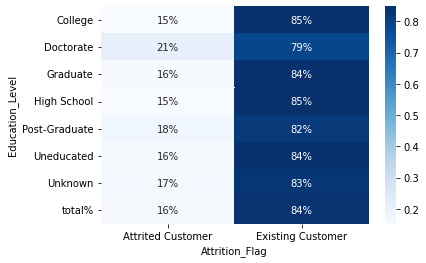

In [24]:
# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Education_Level'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

More than 30% of customers have a graduate level of education and represent the majority in this data. However, even though the graduate group has the highest proportion in this data, it is the doctorate group who shows the highest probability of churn compared to other groups.

7. Marital_Status

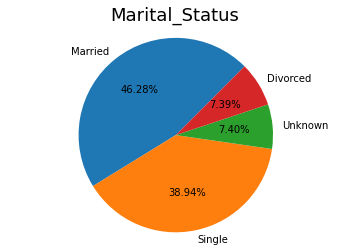

In [27]:
fig, ax = plt.subplots()
ax.pie(df['Marital_Status'].value_counts().values, labels = df['Marital_Status'].value_counts().index, autopct = '%1.2f%%', shadow = False, startangle = 45)
ax.axis('equal')
plt.title('Marital_Status', loc = 'center', fontsize = 18)
plt.show()

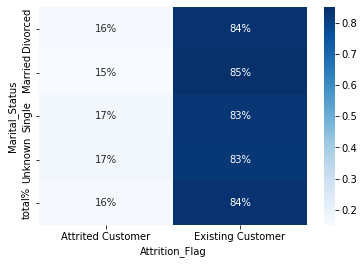

In [28]:
# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Marital_Status'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

8. Income_Category

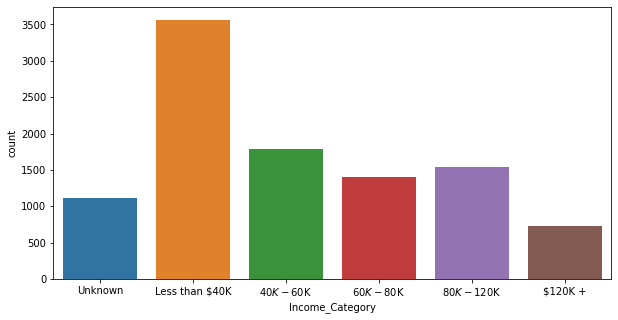

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(x=df['Income_Category'], order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', 
                                              '$80K - $120K', '$120K +'])

Mostly, clients have income less than $40K

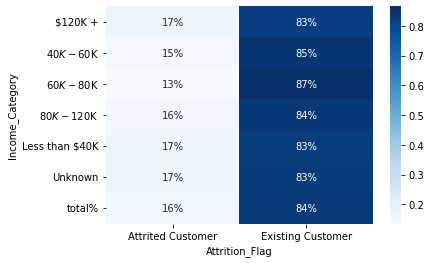

In [31]:
# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(df['Income_Category'], 
            df['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

9. Card_Category

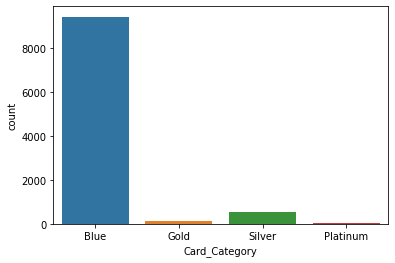

In [33]:
sns.countplot(x=df['Card_Category'])

In [34]:
card_count = df['Card_Category'].value_counts()
print('Blue card -> {} users = {:.2f}%'.format(card_count['Blue'], card_count['Blue']/10127*100),
      'Silver card -> {} users = {:.2f}%'.format(card_count['Silver'], card_count['Silver']/10127*100),
      'Gold card -> {} users = {:.2f}%'.format(card_count['Gold'], card_count['Gold']/10127*100),
      'Platinum card -> {} users = {:.2f}%'.format(card_count['Platinum'], card_count['Platinum']/10127*100), sep = '\n')

Blue card -> 9436 users = 93.18%
Silver card -> 555 users = 5.48%
Gold card -> 116 users = 1.15%
Platinum card -> 20 users = 0.20%


Blue card holders is the most number with 93.18 %

In [35]:
# df['Card_Category'] = df['Card_Category'].replace({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

10. Months_on_book : the number of complete calendar months that have elapsed since calendar month in which the origination date of such purchased loan occurred, measured at the end of each calendar month.

Text(0, 0.5, 'Frequency')

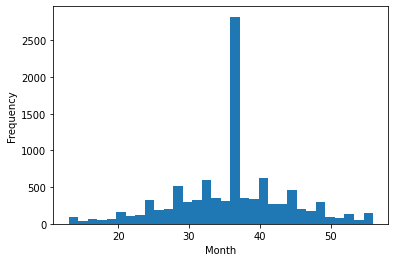

In [36]:
plt.hist(df['Months_on_book'],32)
plt.xlabel('Month')
plt.ylabel('Frequency')

36 months or 3 years is the most occured on client list

11. Total_Relationship_Count : total number of products held by the customers (cards, accounts, etc.)

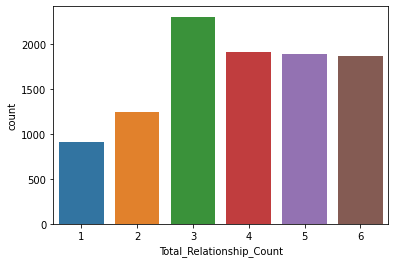

In [37]:
# sns.countplot(x=df['Total_Relationship_Count'], palette = 'flare')
sns.countplot(x=df['Total_Relationship_Count'])

12. Months_Inactive_12_mon : months of inactivity by customers in last 12 months

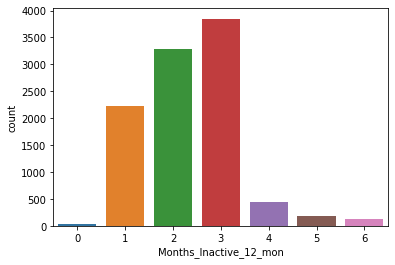

In [38]:
sns.countplot(x=df['Months_Inactive_12_mon'])

Transaction Behaviour

Text(0.5, 1.0, 'Inactive period')

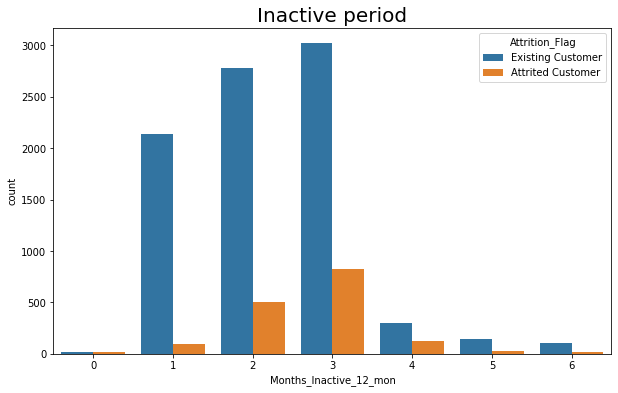

In [39]:
# inactive period

plt.figure(figsize=(10,6))
sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df)
plt.title('Inactive period', fontsize=20)

customer who shows inactivity in their transaction, tends to churn
Since the highest probability of attrition accounts shows up approximately around the first 3 months of their inactivity, The bank needs to be aware and prepare a treatment for customer with this behaviour.

13. Contacts_Count_12_mon : frequency of customer contacts in the last 12 months

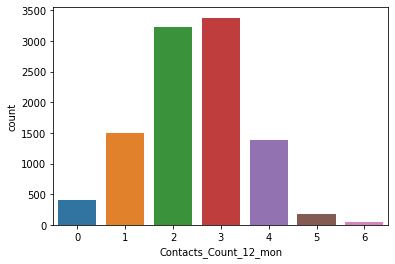

In [40]:
sns.countplot(x=df['Contacts_Count_12_mon'])

14. Credit_Limit : Credit limit on credit card

Text(0, 0.5, 'Frequency')

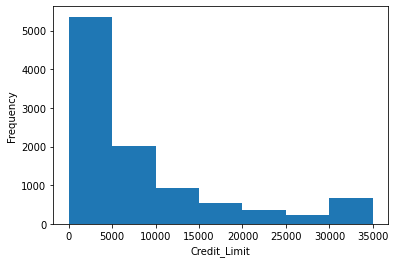

In [41]:
# plt.hist(df['Credit_Limit'],32)
plt.hist(df['Credit_Limit'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.xlabel('Credit_Limit')
plt.ylabel('Frequency')

15. Total_Revolving_Bal : Revolving Balance is the portion of credit card spending that goes unpaid at the end of a billing cycle

Text(0, 0.5, 'Frequency')

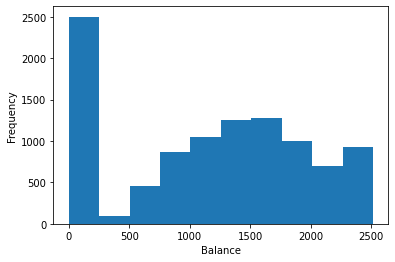

In [42]:
plt.hist(df['Total_Revolving_Bal'])
plt.xlabel('Balance')
plt.ylabel('Frequency')

16. Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)

Text(0, 0.5, 'Frequency')

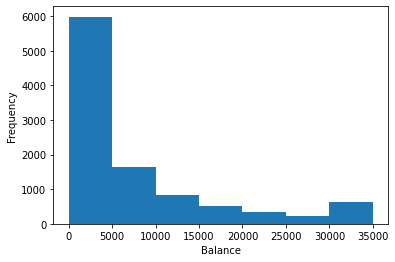

In [43]:
plt.hist(df['Avg_Open_To_Buy'], bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])
plt.xlabel('Balance')
plt.ylabel('Frequency')

17. Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)

Text(0, 0.5, 'Frequency')

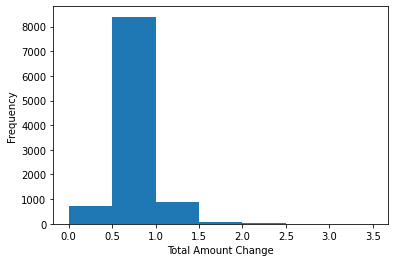

In [44]:
plt.hist(df['Total_Amt_Chng_Q4_Q1'], bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
plt.xlabel('Total Amount Change')
plt.ylabel('Frequency')

18. Total_Trans_Amt : Total Transaction Amount (Last 12 months)

Text(0, 0.5, 'Frequency')

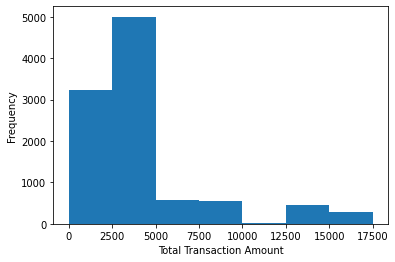

In [45]:
plt.hist(df['Total_Trans_Amt'], bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500])
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')

19. Total_Trans_Ct : Total Transaction Count (Last 12 months)

Text(0, 0.5, 'Frequency')

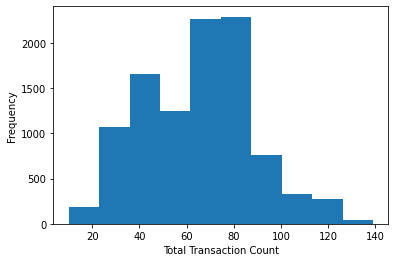

In [46]:
plt.hist(df['Total_Trans_Ct'])
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')

20. Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)

Text(0, 0.5, 'Frequency')

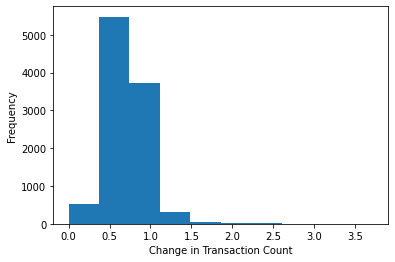

In [47]:
plt.hist(df['Total_Ct_Chng_Q4_Q1'])
plt.xlabel('Change in Transaction Count')
plt.ylabel('Frequency')

21. Avg_Utilization_Ratio : Average Card Utilization Ratio

Text(0, 0.5, 'Frequency')

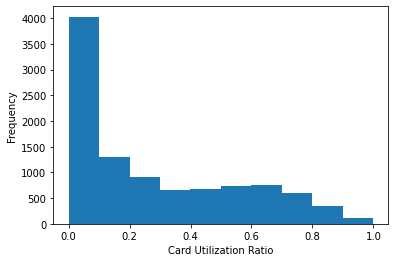

In [48]:
plt.hist(df['Avg_Utilization_Ratio'])
plt.xlabel('Card Utilization Ratio')
plt.ylabel('Frequency')

<Figure size 2160x432 with 0 Axes>

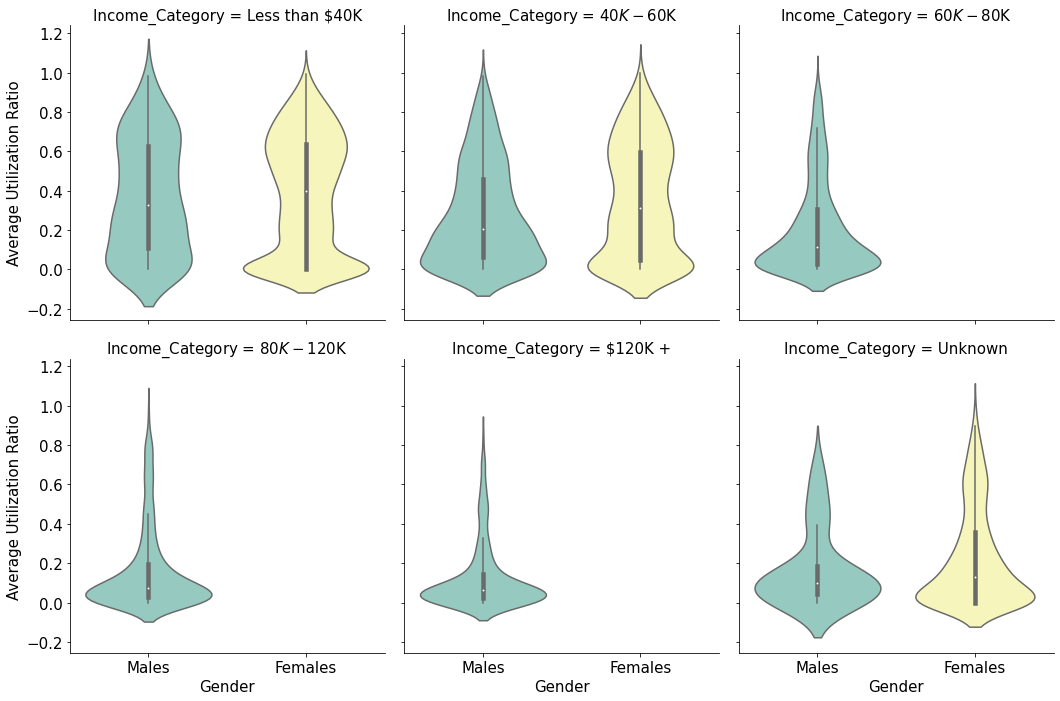

In [49]:
# avg utilization behaviour between gender based on level of income

order= ['Less than $40K', '$40K - $60K', '$60K - $80K',  '$80K - $120K', 
       '$120K +', 'Unknown']
plt.figure(figsize=[30,6])
plt.rcParams['font.size']= 15
plot = sns.catplot(data=df, x='Gender', y='Avg_Utilization_Ratio', col='Income_Category', kind='violin', palette = 'Set3' ,col_wrap=3,
           col_order= order)
plot.set_ylabels('Average Utilization Ratio')
plt.xticks(ticks=[0,1], labels= ['Males', 'Females'])
plt.ylabel('Average Utilization Ratio')
plt.show()

Both Females and Males have nearly the same utilization ratio distributions
except in the income category lower than 40K where Females have much higher utilization ratio
no female clients having income of above 60K
Another interesting finding is that people with higher income has lower utilization ratios

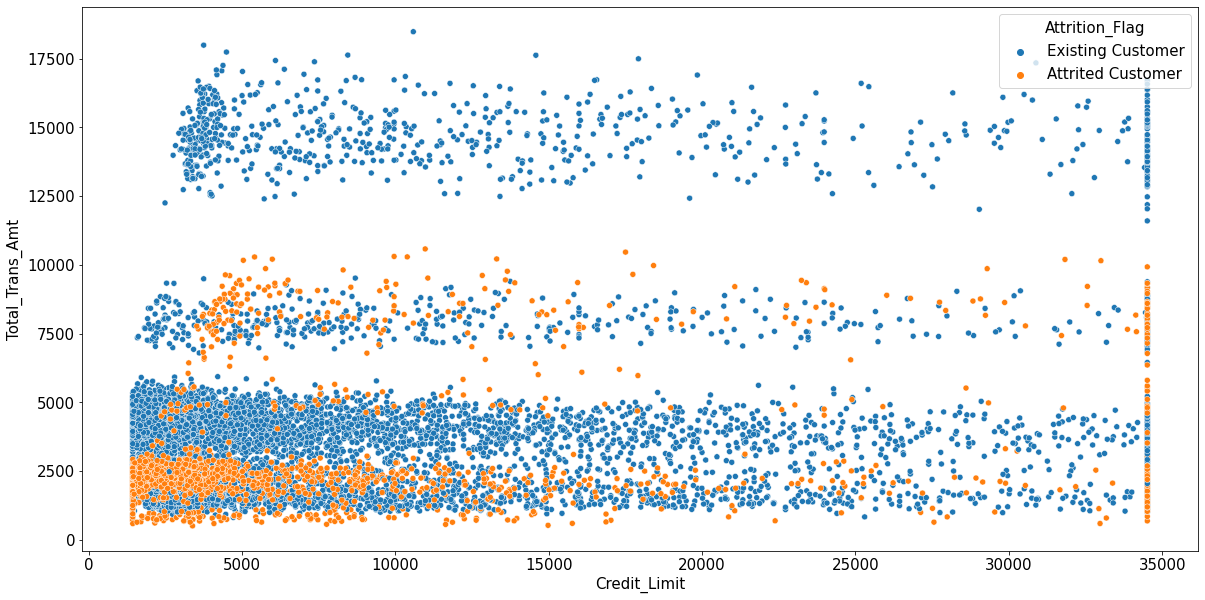

In [50]:
# total transaction of clients from existing and attrited group based on their credit limit

plt.figure(figsize=[20,10])
sns.scatterplot( x = 'Credit_Limit', y = 'Total_Trans_Amt', data = df, hue = 'Attrition_Flag' ) 

1:attrited customer have only less than 11K of total transaction; 
2:only the loyal customers who spent around more than 12.500K in their total transaction; 
3:similar pattern also found in every flag of credit limit.
4:Hence, it is suggested that the bank should prepare a treatment to target more customers with a total transaction of less than 11K

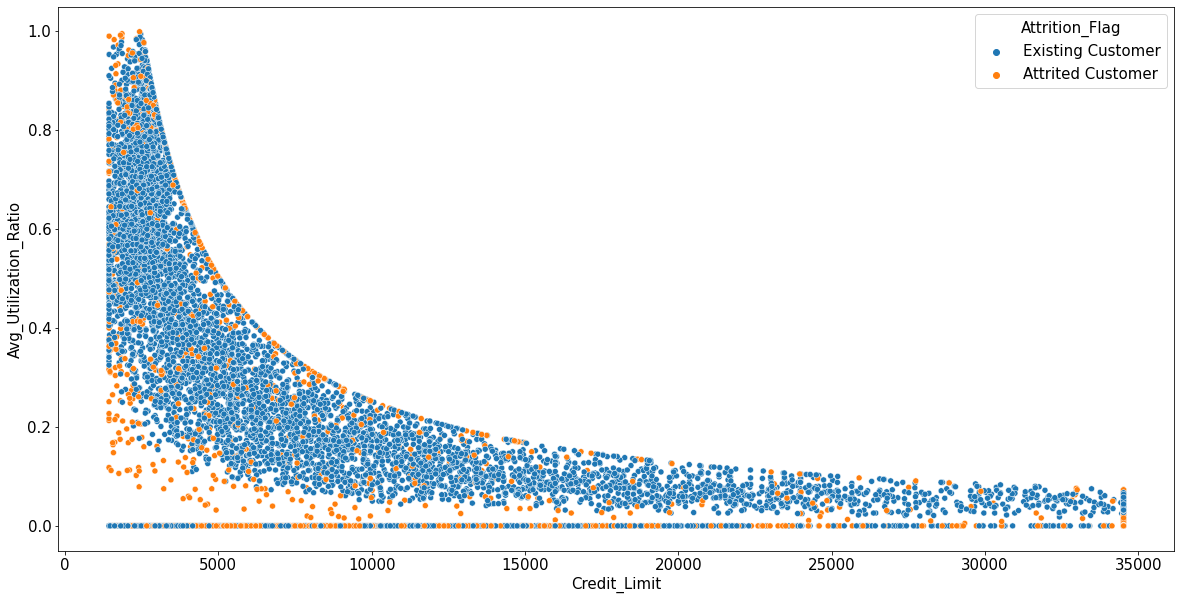

In [51]:
# credit limit vs avg utilization
plt.figure(figsize=[20,10]);
sns.scatterplot(data=df, x = 'Credit_Limit', y ='Avg_Utilization_Ratio', hue='Attrition_Flag' ) 

1: The graph shows that as credit limit is increasing, avg_utilization is decreasing exponentially,
2: We can say that customers with higher credit limits tend to have low average transaction behaviors.
3: That can be translated as people being less likely to use their credit cards, even with a higher limit offer.

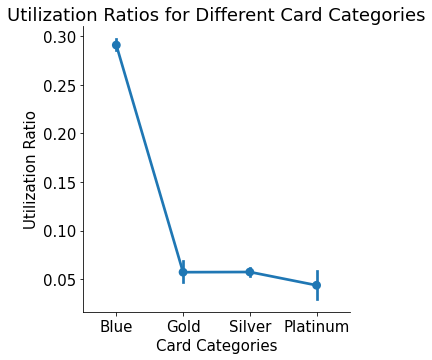

In [52]:
# card type vs utilization

sns.catplot(data=df, x='Card_Category', y='Avg_Utilization_Ratio' , kind='point')
plt.xlabel(xlabel='Card Categories')
plt.ylabel('Utilization Ratio')
plt.title('Utilization Ratios for Different Card Categories');
plt.show()

In [53]:
# number of customer in each attrition flag group based on their card category

card = pd.crosstab(df['Card_Category'],df['Attrition_Flag'], margins = True, margins_name = "Total")
card

Attrition_Flag,Attrited Customer,Existing Customer,Total
Card_Category,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
Total,1627,8500,10127


In [54]:
# percentage of churning based on card holder

churn_percent = ((card['Attrited Customer']/card['Total'])*100).to_frame('churn_percent').reset_index()
churn_percent

# while based on probability, Platinum card holder display the highest probability to churn
# followed by Gold and Blue card holder

,Card_Category,churn_percent
0,Blue,16.097923
1,Gold,18.103448
2,Platinum,25.000000
3,Silver,14.774775
4,Total,16.065962


1: Highest utilization ratio is found in the lowest card category (Blue Card)
2: Blue card is the most popular card type choosen by customer
3: based on the quantity, Blue Card holder shows the highest number of churning
4: But looking at the percentages, Platinum card holders appeared as the group with the highest probability of churning.

Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Card Category')

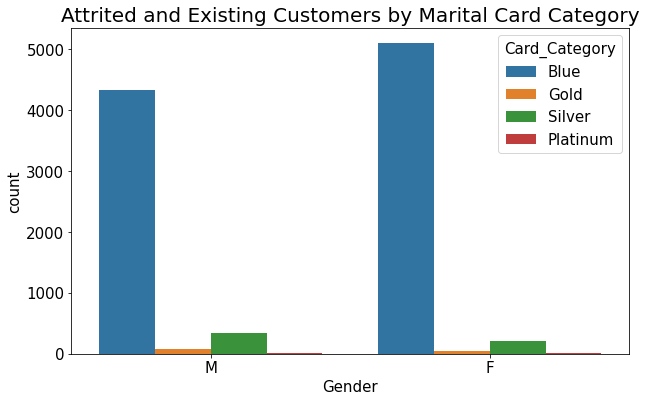

In [55]:
# card type vs gender

plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Card_Category', data=df)
plt.title('Attrited and Existing Customers by Marital Card Category', fontsize=20)

blue card comes as the most popular type of card among both male and female clients

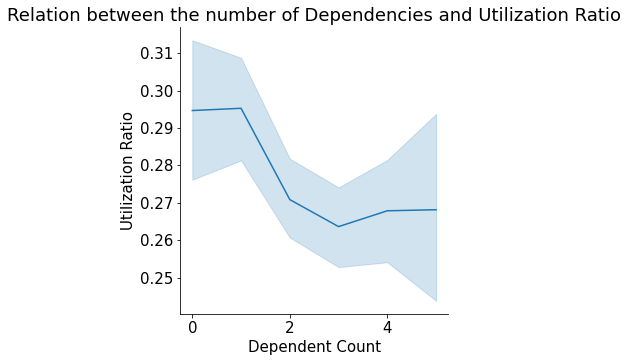

In [56]:
#Dependents Count vs Avg Utilization Ratio

sns.relplot(data=df, x='Dependent_count', y='Avg_Utilization_Ratio', kind='line' )
plt.xlabel('Dependent Count')
plt.ylabel('Utilization Ratio')
plt.title('Relation between the number of Dependencies and Utilization Ratio');

1: people with only 1 dependant or without depicted to have the highest activity,
and gradualy sink as the number of dependant is increasing
2: It is conspicuous that people with greater dependencies tend to use credit cards more wisely
3: The biggest group of CC users in this dataset either has 4-5 dependecies or has none.

In [58]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

22. Naive_Bayes_Classifier_01 : Naive_Bayes_Classifier predict as Attrited Customer

23. Naive_Bayes_Classifier_02 : Naive_Bayes_Classifier predict as Existing Customer

Based on the source, we can ignore the last 2 columns of this dataset. so, we are going to drop the unneeded columns.

Features Aanlysis

In [62]:
features = df.columns[1:21].tolist()
features

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

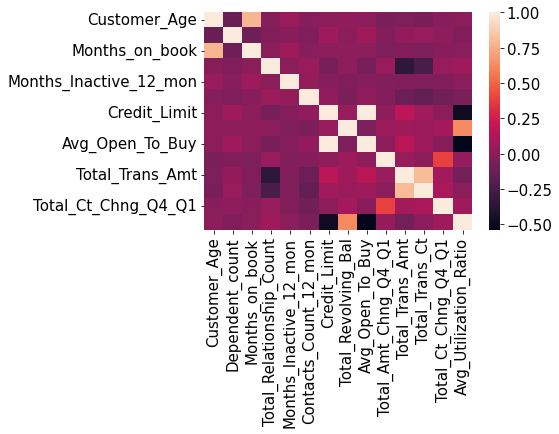

In [63]:
corr = df[features].corr()
sns.heatmap(corr)

In [64]:
col = {}
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] >= 0.75:
            name = str(features[i]) + ' - ' + str(features[j])
            col[name] = corr.iloc[i, j]
col

{'Gender - Attrition_Flag': 0.7889123589930508,
 'Months_on_book - Income_Category': 0.995980543932001,
 'Contacts_Count_12_mon - Months_Inactive_12_mon': 0.8071920346514367}

correlation analysis

In [67]:
df[['Income_Category', 'Gender']]

,Income_Category,Gender
0,$60K - $80K,M
1,Less than $40K,F
2,$80K - $120K,M
3,Less than $40K,F
4,$60K - $80K,M
...,...,...
10122,$40K - $60K,M
10123,$40K - $60K,M
10124,Less than $40K,F
10125,$40K - $60K,M


1.1 Income - Gender

On average, Female have income less than Male

1.2 Month on book - Customer Age

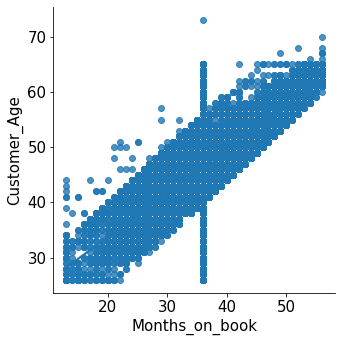

In [70]:
# sns.lmplot(x='Months_on_book', y='Customer_Age', data=df, hue='Attrition_Flag')
sns.lmplot(x='Months_on_book', y='Customer_Age', data=df)

It seems that Customer_Age has linear correlation with Months_on_book

1.3 Average open to buy - Credit Limit

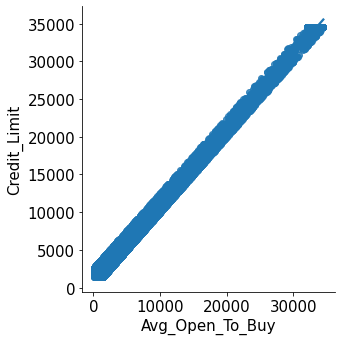

In [71]:
sns.lmplot(x='Avg_Open_To_Buy', y='Credit_Limit', data = df)

Avg_Open_To_Buy has strong linear correlation with Credit_Limit

1.4 Total Transaction Count - Total Transaction Amount

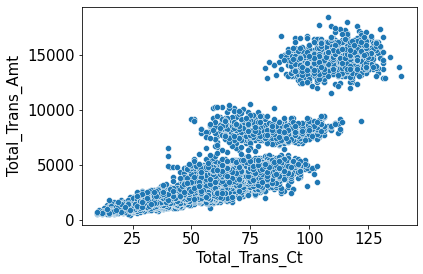

In [72]:
a = sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', data = df)
# a.axhline(6250, color = 'red')
# a.axhline(11250, color = 'red')
a

It looks like not a linear correlation but their correlation can divide into 3 clusters

In [78]:
# Droping CLIENTNUM columns because Client numberis unique identifier for the customer holding the account
# So this number doesn't really effect our churn prediction.
df.drop(['CLIENTNUM'], axis=1, inplace=True)

In [79]:
# All columns
cols = df.columns
# Find numerical columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [80]:
# All columns
cols = df.columns
# Find numerical columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [81]:
# Categorical Columns
categorical = list(set(cols) - set(num_cols))
categorical

['Gender',
 'Attrition_Flag',
 'Card_Category',
 'Education_Level',
 'Marital_Status',
 'Income_Category']

In [83]:
# Plot categorical columns
def pltCountplot(cat, df):
    
    fig, axis = plt.subplots(len(cat) // 2, 2, figsize=(20,16))  

    index = 0
    sns.set()
    for i in range(len(cat) // 2):
            
        for j in range(2):

            ax = sns.countplot(x=df[cat[index]], data=df, ax=axis[i][j]);
        
            for item in ax.get_xticklabels():
               item.set_rotation(15)

            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width(), height + 3, '{:1.2f}%'.format(height/len(df)*100), ha="center", fontsize=14) 
            
            index += 1

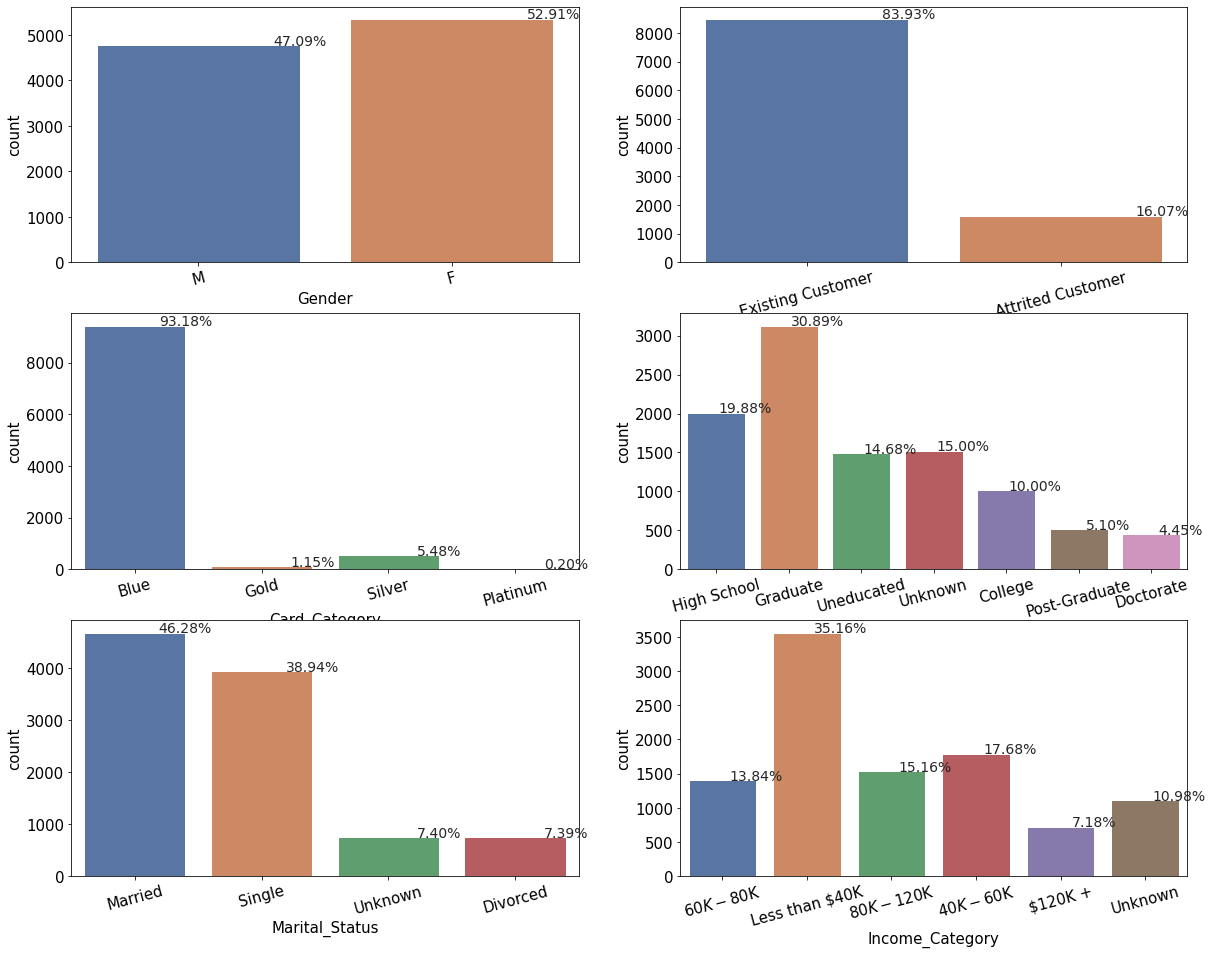

In [84]:
# Plot categorical columns
pltCountplot(categorical, df)
plt.show()

In [85]:
def pltcrosstab(cat, df):
    
    fig, axis = plt.subplots((len(cat) // 3), 3, figsize=(16,8))  
    fig.tight_layout()

    index = 0
    sns.set()
    for i in range((len(cat) // 3)):
            
        for j in range(3):
            
            # Since we have 11 numerical columns, some plots will be empty
            if index == len(cat):
                break
            
            ax = pd.crosstab(df[cat[index]], df['Attrition_Flag']).plot(kind='bar', ax=axis[i][j])
        
            for item in ax.get_xticklabels():
                item.set_rotation(20)

            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width(), height + 3, '{:1.2f}%'.format(height/len(df)*100), ha="center", fontsize=8) 
            
            index += 1
            
    plt.subplots_adjust(wspace=0.2, hspace=0.4)

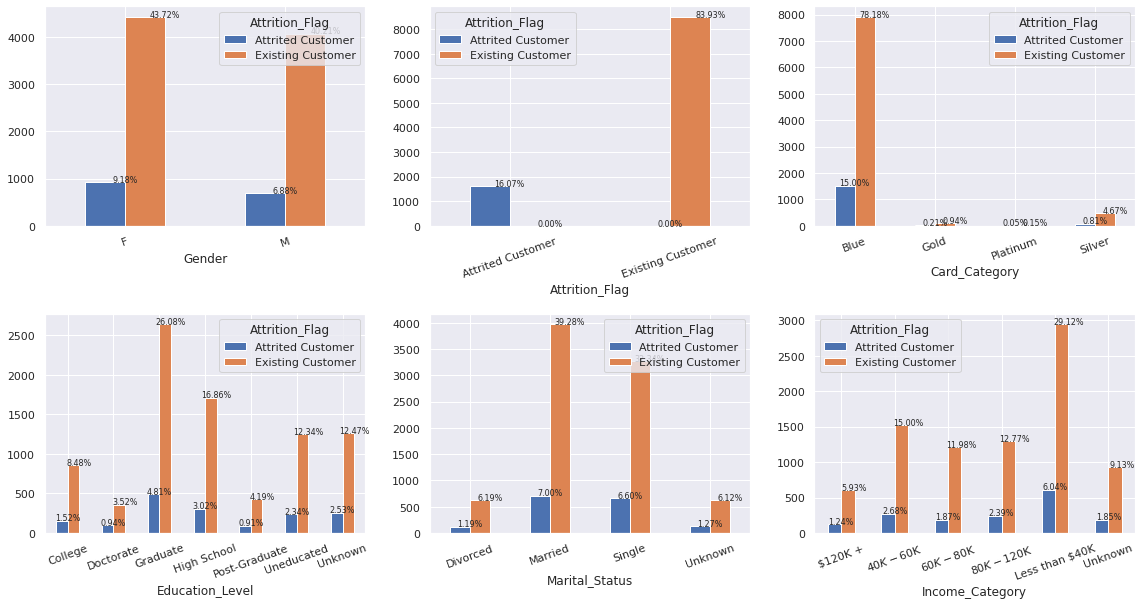

In [86]:
# Plot categorical columns with different Attrition_Flag
pltcrosstab(categorical, df);

We can see in above plots, with different attrention_flag, how our categorical values change and also can see in which categiries we seeing churning customers the most.

%93.17 of churned clients have Blue card
%35.15 of churned clients have less than $40K
%46.28 of churned clients are married
%30.88 of churned clients have graduate education level

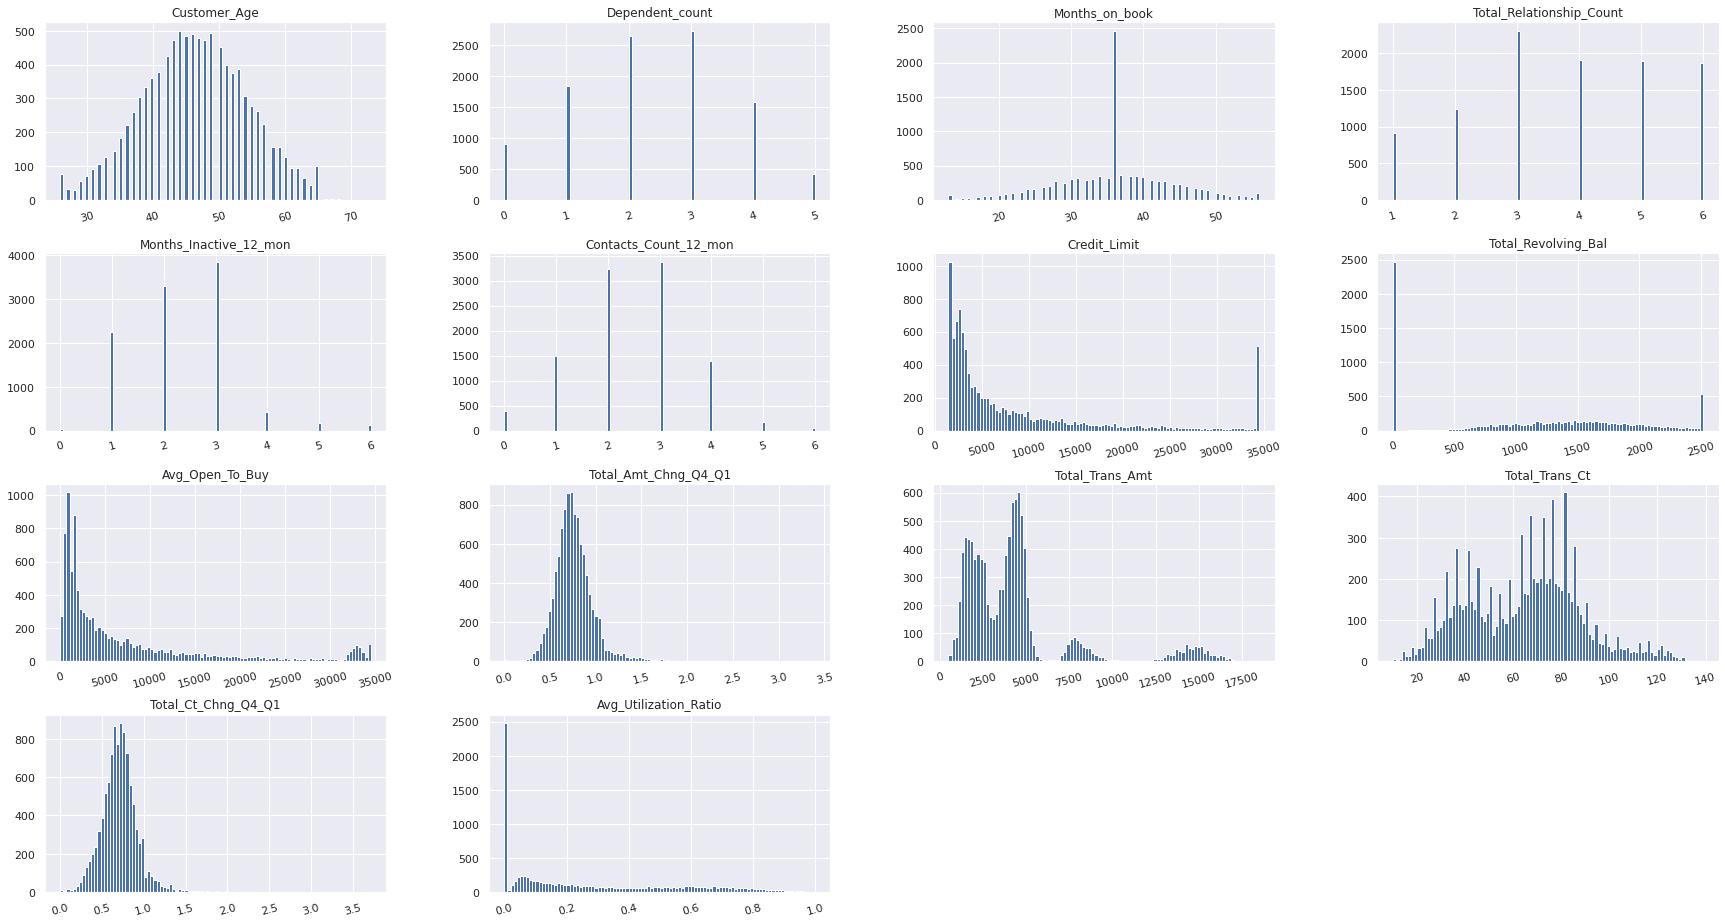

In [87]:
# Check distribution of numerical features
df.hist(figsize=(30,16), xrot=15, bins=int(df.shape[0]**0.5));

In [88]:
from scipy.stats import norm
def plotDistPlot(df, columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

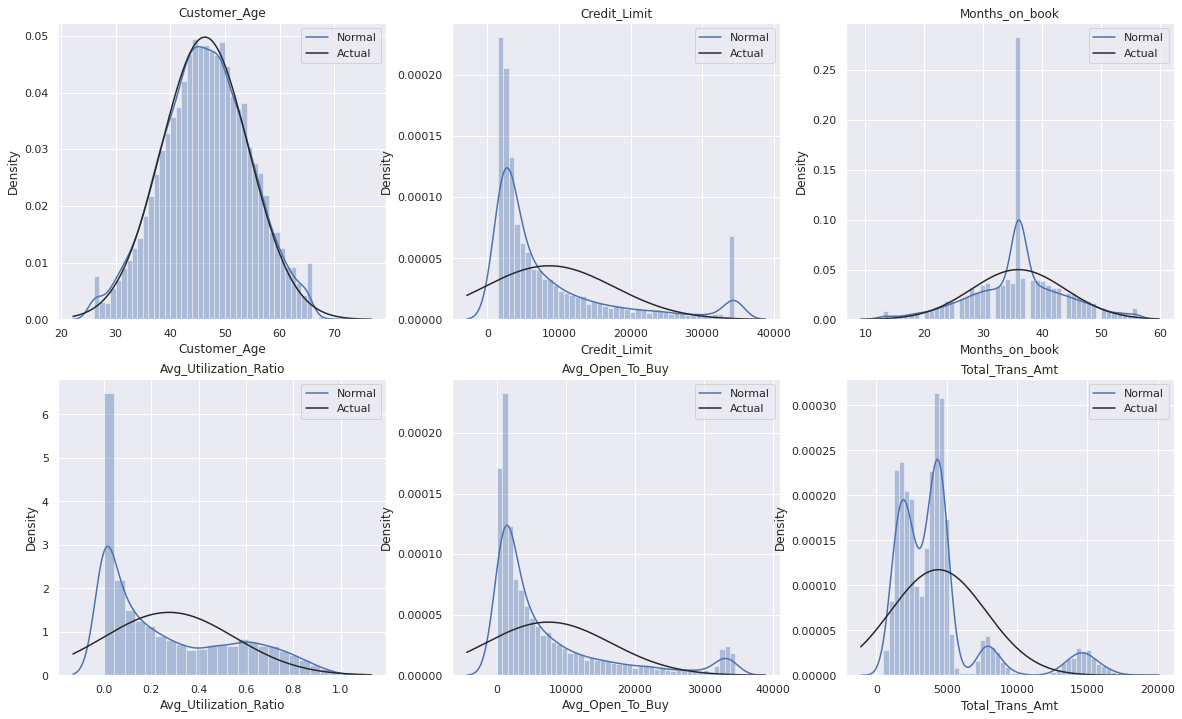

In [89]:
some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']
plotDistPlot(df, some_columns)

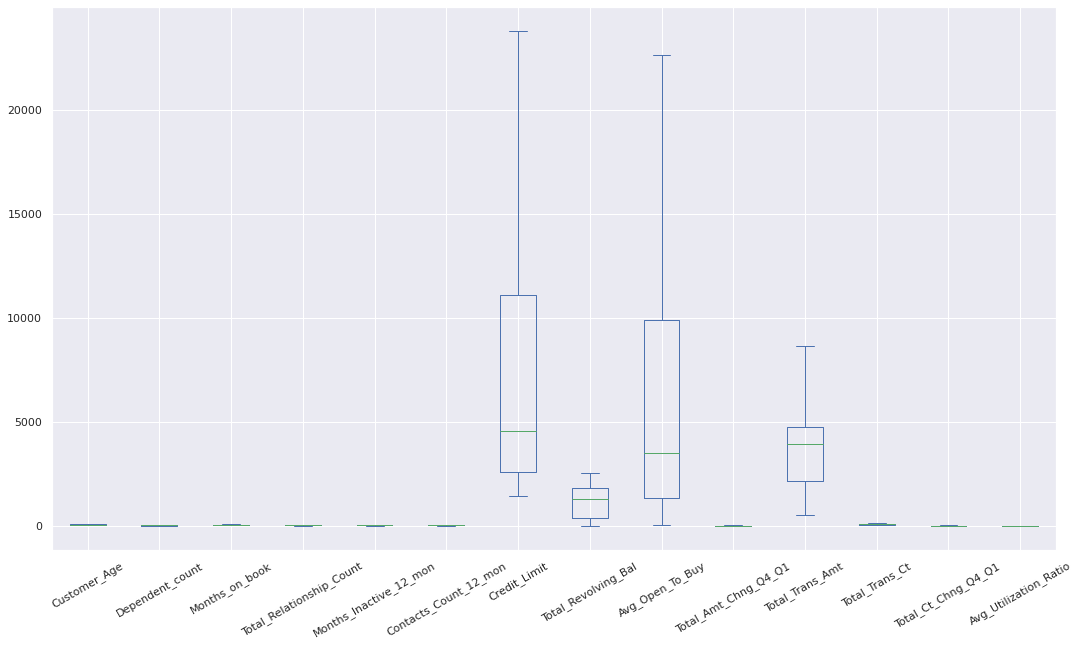

In [90]:
df.plot(kind='box', figsize = (18,10), rot=30, showfliers=False);


In [91]:
# Check distribution of numerical features
sns.pairplot(df, hue='Attrition_Flag', height=2.5)

Output hidden; open in https://colab.research.google.com to view.

Here we can see all numerical columns and Attrition_Flag distribution

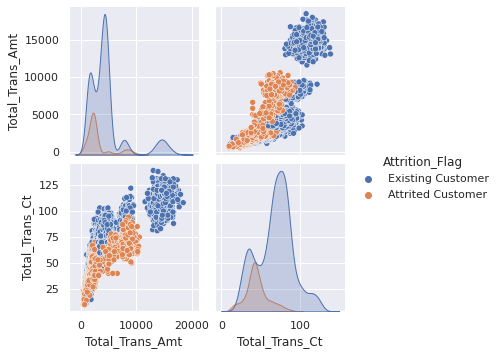

In [92]:
sns.pairplot(df, vars=['Total_Trans_Amt','Total_Trans_Ct'], hue='Attrition_Flag', height=2.5)

This one is interesting that found in above pairplot of numerical columns, people who churned from credit card service, had less transaction count and transaction amount!

Check Correlation

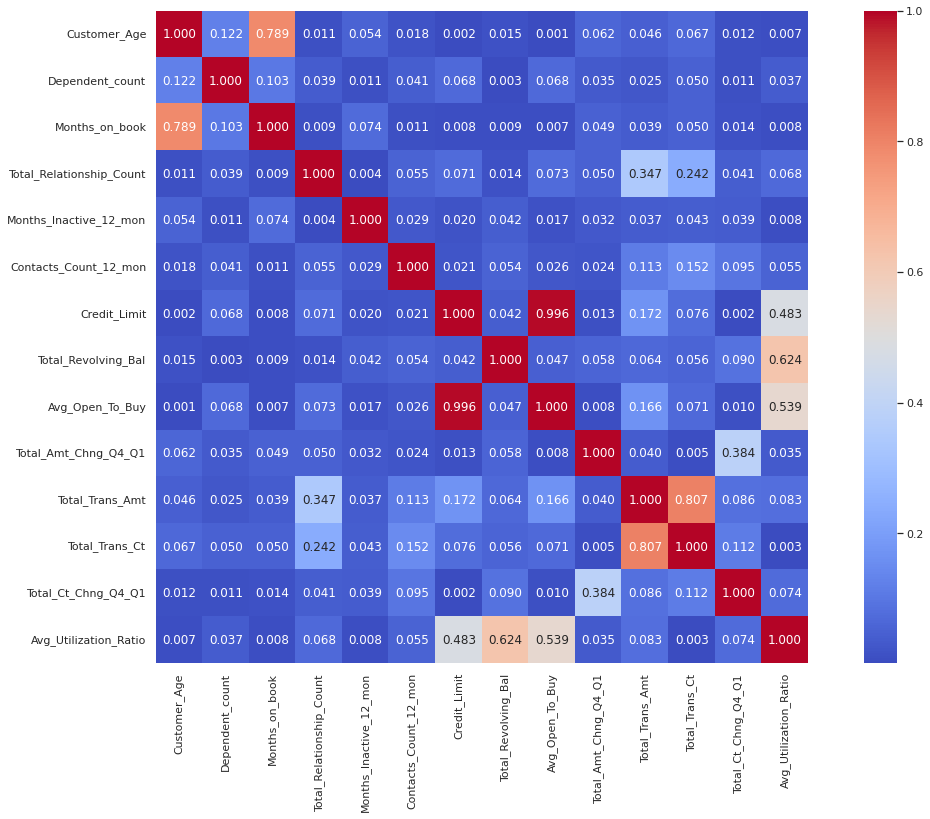

In [93]:
num_cols = df._get_numeric_data().columns
corr_data = df.loc[:, num_cols].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

Months_on_book seems like correlated with Customer_Age .

Total Transaction Count is correlated with Total Transaction Amount

Feature Engineering

Change categorical Attrition_Flag feature to numerical feature and rename it as churn.

In [94]:
# tag churned users as 1, rest as 0 and rename column
df['Attrition_Flag'].replace(('Existing Customer','Attrited Customer'), (0,1), inplace=True)

In [95]:
df.rename(columns={'Attrition_Flag':'churn'}, inplace=True)

Convert income category to numerical values(preferred to give order depending on their income category instead of get dummies to avoid increasing the dataset size)

In [96]:
# Wanted to order income category because I didn't want to increase my feature column numbers by getting dummies from income category
df = df.copy()
df['Income_Category'] = df['Income_Category'].replace({'Unknown': 0 ,'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})

Get dummies for rest of the categorical features.

In [98]:
categorical = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns = categorical, drop_first=True)

Examine the correlations between the features and the target.

In [100]:
# Examine the correlations between the features and the target.
corr = df.select_dtypes(include=[np.number]).corr()
print (corr['churn'].sort_values(ascending=False)[:5], '\n')
print (corr['churn'].sort_values(ascending=False)[-5:])

churn                        1.000000
Contacts_Count_12_mon        0.204491
Months_Inactive_12_mon       0.152449
Education_Level_Doctorate    0.029386
Marital_Status_Single        0.019037
Name: churn, dtype: float64 

Total_Trans_Amt         -0.168598
Avg_Utilization_Ratio   -0.178410
Total_Revolving_Bal     -0.263053
Total_Ct_Chng_Q4_Q1     -0.290054
Total_Trans_Ct          -0.371403
Name: churn, dtype: float64


Check corralated features with eachother

In [101]:
# Check corralated features with eachother
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.select_dtypes(include=[np.number]).columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    corr = df.select_dtypes(include=[np.number]).corr()
    au_corr = corr.abs().unstack()
    labels_to_drop = get_redundant_pairs(df.select_dtypes(include=[np.number]))
    #From corrolation table, drop the diagonals(which gives 1 corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))

Top Absolute Correlations
Credit_Limit            Avg_Open_To_Buy          0.995981
Total_Trans_Amt         Total_Trans_Ct           0.807192
Customer_Age            Months_on_book           0.788912
Income_Category         Gender_M                 0.783925
Marital_Status_Married  Marital_Status_Single    0.741185
Total_Revolving_Bal     Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy         Avg_Utilization_Ratio    0.538808
Credit_Limit            Avg_Utilization_Ratio    0.482965
                        Card_Category_Silver     0.441030
Avg_Open_To_Buy         Card_Category_Silver     0.439790
dtype: float64


Modelling

Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [104]:
# set x and y
X = df.drop('churn', axis = 1)
y = df['churn']

# train test split
# stratify=y preserve the proportion of target as in orginal dataset in the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

# set the model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression()

In [105]:
# Baseline accuracy = proportion of the majority class
print('Baseline Accuracy: ',1. - y_train.mean())
print('Train Accuracy :',logreg.score(X_train, y_train))
print('Test Accuracy: ',logreg.score(X_test, y_test))

Baseline Accuracy:  0.8393680052666228
Train Accuracy : 0.8896642527978933
Test Accuracy:  0.891785150078989


In [106]:
# confusion matrix
y_pred = logreg.predict(X_test)
cf = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(cf, columns=['pred neg','pred pos'], index=['actual neg','actual pos'])

,pred neg,pred pos
actual neg,2064,61
actual pos,213,194


In [107]:
from IPython import display
def confisuon_matrix_summary(y_test, model, treshold):
    
    model_pred_proba = model.predict_proba(X_test)[:,1]
    cf = metrics.confusion_matrix(y_true=y_test, y_pred=model_pred_proba > treshold)
    cm = pd.DataFrame(cf, columns=['pred neg','pred pos'], index=['actual neg','actual pos'])
    
    display.display(cm)
    
    print('Classification treshold is ', treshold)
    # Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. 
    # It answers the question “What proportion of actual positives was identified correctly?”
    print('True Positive Rate/Recall = TP/(TP+FN) :', cf[1][1] / (cf[1][1] + cf[1][0]))     #same as metrics.recall_score(y_test,y_pred)
    print('False Positive Rate = FP/(FP+TN) :', cf[0][1] / (cf[0][1] + cf[0][0]))
    # Accuracy - ratio of correctly predicted observation to the total observations.
    print('Accuracy = (TP+TN)/total :', (cf[1][1]+cf[0][0])/(cf[1][1]+cf[0][0]+cf[0][1]+cf[1][0]))
    # Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
    # It answers the question “What proportion of positive identifications was actually correct?”
    print('Precision = TP/(TP+FP) :',  (cf[1][1]/(cf[1][1]+cf[0][1])))   #same as metrics.precision_score(y_test,y_pred)
    
confisuon_matrix_summary(y_test, logreg, 0.5)

,pred neg,pred pos
actual neg,2064,61
actual pos,213,194


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.47665847665847666
False Positive Rate = FP/(FP+TN) : 0.028705882352941175
Accuracy = (TP+TN)/total : 0.891785150078989
Precision = TP/(TP+FP) : 0.7607843137254902


In [108]:
from IPython import display
# normalise confusion matrix with 'weighted'(calculate metrics for each label) precisions
def verify_performance(y_true, y_pred, model, display_matrix=True):
    print(f"Weighted Average Precision: {metrics.precision_score(y_true, y_pred, average='weighted'):.4f}")  
    confusion_matrix = pd.DataFrame(
        metrics.confusion_matrix(y_true, y_pred, normalize='true'),
        index=model.classes_, columns=model.classes_).round(2)
      
    display.display(pd.Series(
        np.diagonal(confusion_matrix.T), 
        index=confusion_matrix.index, 
        name='individual precision').to_frame().T)
  
    if display_matrix:
        display.display(confusion_matrix)
        
verify_performance(y_test, y_pred, logreg)

Weighted Average Precision: 0.8830


,0,1
individual precision,0.97,0.48


,0,1
0,0.97,0.03
1,0.52,0.48


In [110]:
# We can vary the classification threshold for our model to get different predictions.
# By setting a lower probability threshold we will predict more positive classes. Which means we will predict more true positives, but fewer true negatives.

# confusion matrix (changing threshold to 0.4)
confisuon_matrix_summary(y_test, logreg, 0.4)

,pred neg,pred pos
actual neg,2014,111
actual pos,170,237


Classification treshold is  0.4
True Positive Rate/Recall = TP/(TP+FN) : 0.5823095823095823
False Positive Rate = FP/(FP+TN) : 0.05223529411764706
Accuracy = (TP+TN)/total : 0.8890205371248026
Precision = TP/(TP+FP) : 0.6810344827586207


In [111]:
logreg_pred_proba = logreg.predict_proba(X_test)[:,1]
verify_performance(y_test, logreg_pred_proba > .4, logreg)

Weighted Average Precision: 0.8834


,0,1
individual precision,0.95,0.58


,0,1
0,0.95,0.05
1,0.42,0.58


Seems like chaning treshtold didn't increase out precision, let's try another algorithm

In [112]:
# Examine the intercept.
logreg.intercept_

array([0.06499442])

In [113]:
# Examine the coefficients.
# The higher the coefficient, the higher the “importance” of a feature.

coefficients = list(zip(X_train.columns, logreg.coef_[0]))
coefficients

[('Customer_Age', 0.03323011007600464),
 ('Dependent_count', 0.3404924265472148),
 ('Income_Category', -0.08257621026838019),
 ('Months_on_book', -0.0025974621628743044),
 ('Total_Relationship_Count', -0.4026099245910926),
 ('Months_Inactive_12_mon', 0.4818250149902378),
 ('Contacts_Count_12_mon', 0.6183176161063225),
 ('Credit_Limit', -0.0003256432216735678),
 ('Total_Revolving_Bal', -0.0006448866219081945),
 ('Avg_Open_To_Buy', 0.00031924340081765124),
 ('Total_Amt_Chng_Q4_Q1', -0.029619925430296287),
 ('Total_Trans_Amt', 0.00036982729760699204),
 ('Total_Trans_Ct', -0.09777831945601761),
 ('Total_Ct_Chng_Q4_Q1', -0.12114299214567498),
 ('Avg_Utilization_Ratio', 0.006680099025042686),
 ('Gender_M', -0.07800169871053461),
 ('Education_Level_Doctorate', 0.013878085023862105),
 ('Education_Level_Graduate', 0.0098343255489125),
 ('Education_Level_High School', 0.008186931021052531),
 ('Education_Level_Post-Graduate', 0.013007983940710446),
 ('Education_Level_Uneducated', -0.0040483885443

Mean of Accuracy for all  5  folds:  Accuracy:  0.8503125053319195
Mean of Precision  5  folds:  Precision:  0.8802557256970542
Mean of Recall  5  folds:  Recall:  0.8503125053319195
Mean of Accuracy for all  6  folds:  Accuracy:  0.8311384287053398
Mean of Precision  6  folds:  Precision:  0.8648967904362689
Mean of Recall  6  folds:  Recall:  0.8311384287053398
Mean of Accuracy for all  7  folds:  Accuracy:  0.8513929643695908
Mean of Precision  7  folds:  Precision:  0.8748313117364014
Mean of Recall  7  folds:  Recall:  0.8513929643695908
Mean of Accuracy for all  8  folds:  Accuracy:  0.844657709383137
Mean of Precision  8  folds:  Precision:  0.8741546257546828
Mean of Recall  8  folds:  Recall:  0.844657709383137
Mean of Accuracy for all  9  folds:  Accuracy:  0.8489373067561344
Mean of Precision  9  folds:  Precision:  0.8728978278828744
Mean of Recall  9  folds:  Recall:  0.8489373067561344


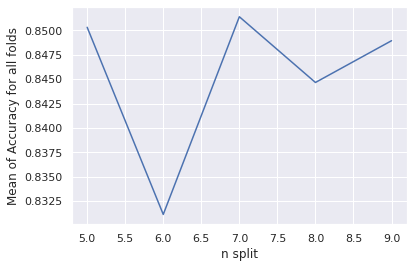

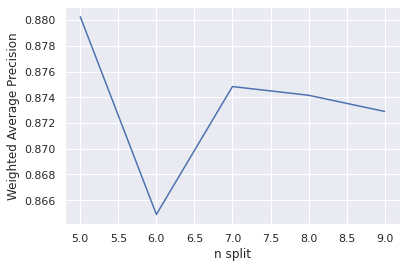

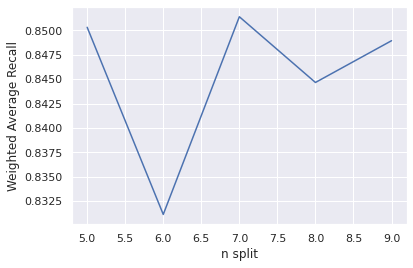

In [114]:
# K-folds Cross Validation
from sklearn.model_selection import cross_val_score

def cross_val_accuracy_precision(model, X, y):
    acc = []
    precisions=[]
    recalls=[]
    for n in range(5,10):

        # Note the results will vary each run since we take a different
        # subset of the data each time (since shuffle=True)
        scores = np.mean(cross_val_score(model, X, y, cv=n, scoring='accuracy'))
        acc.append(scores)
        p = np.mean(cross_val_score(model, X, y, cv=n, scoring=metrics.make_scorer(metrics.precision_score, average='weighted')))
        precisions.append(p)
        r = np.mean(cross_val_score(model, X, y, cv=n, scoring=metrics.make_scorer(metrics.recall_score, average='weighted')))
        recalls.append(r)
        print('Mean of Accuracy for all ', str(n), ' folds: ', 'Accuracy: ', scores)
        print('Mean of Precision ', str(n), ' folds: ', 'Precision: ', p)
        print('Mean of Recall ', str(n), ' folds: ', 'Recall: ', r)
        
    # plot to see clearly
    plt.plot(range(5,10), acc)
    plt.xlabel('n split')
    plt.ylabel('Mean of Accuracy for all folds')
    plt.show();
    plt.plot(range(5,10), precisions)
    plt.xlabel('n split')
    plt.ylabel('Weighted Average Precision')
    plt.show();
    plt.plot(range(5,10), recalls)
    plt.xlabel('n split')
    plt.ylabel('Weighted Average Recall')
    plt.show();
    
logreg_cv=LogisticRegression()
cross_val_accuracy_precision(logreg_cv, X, y)

Now let's try to tune parameters and see if we going to get better recall.

Parameter Tuning with GridSearch

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('classifier' , LogisticRegression())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV(pipe, 
                   param_grid = param_grid, 
                   cv = 5, 
                   scoring=metrics.make_scorer(metrics.recall_score), # maximise recall to minimise FN
                   return_train_score=True,
                   n_jobs=-1,
                   verbose=True)
clf.fit(X, y)  
clf.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Pipeline(steps=[('classifier',
                 LogisticRegression(C=3792.690190732246, penalty='l1',
                                    solver='liblinear'))])

In [117]:
# set x and y
X = df.drop('churn', axis = 1)
y = df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

# set the model
logreg = LogisticRegression(C=3792.690190732246, penalty='l1',
                                    solver='liblinear')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=3792.690190732246, penalty='l1', solver='liblinear')

In [119]:
confisuon_matrix_summary(y_test, logreg, 0.5) 

,pred neg,pred pos
actual neg,2054,71
actual pos,172,235


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.5773955773955773
False Positive Rate = FP/(FP+TN) : 0.033411764705882356
Accuracy = (TP+TN)/total : 0.9040284360189573
Precision = TP/(TP+FP) : 0.7679738562091504


In [120]:
verify_performance(y_test, y_pred, logreg)

Weighted Average Precision: 0.8830


,0,1
individual precision,0.97,0.48


,0,1
0,0.97,0.03
1,0.52,0.48


This isn't the best recall, let's check another model!

Ridge Classifier

In [122]:
# RidgeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import StandardScaler

# set x and y
X = df.drop('churn', axis = 1)
y = df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

RidgeClassifier()

In [123]:
print('Train Accuracy :',ridge.score(X_train, y_train))
print('Test Accuracy: ',ridge.score(X_test, y_test))

Train Accuracy : 0.8986175115207373
Test Accuracy:  0.9048183254344392


In [124]:
# Baseline accuracy = proportion of the majority class
1. - y_train.mean()

0.8393680052666228

In [125]:
from IPython import display
def confisuon_matrix_summary_ridge(y_test, model):
    # confusion matrix
    y_pred = model.predict(X_test)
    cf = metrics.confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cf, columns=['pred neg','pred pos'], index=['actual neg','actual pos'])

    display.display(cm)
    
    print('Classification treshold is 0.5')
    # Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. 
    # It answers the question “What proportion of actual positives was identified correctly?”
    print('True Positive Rate/Recall = TP/(TP+FN) :', cf[1][1] / (cf[1][1] + cf[1][0]))     #same as metrics.recall_score(y_test,y_pred)
    print('False Positive Rate = FP/(FP+TN) :', cf[0][1] / (cf[0][1] + cf[0][0]))
    # Accuracy - ratio of correctly predicted observation to the total observations.
    print('Accuracy = (TP+TN)/total :', (cf[1][1]+cf[0][0])/(cf[1][1]+cf[0][0]+cf[0][1]+cf[1][0]))
    # Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
    # It answers the question “What proportion of positive identifications was actually correct?”
    print('Precision = TP/(TP+FP) :',  (cf[1][1]/(cf[1][1]+cf[0][1])))   #same as metrics.precision_score(y_test,y_pred)
confisuon_matrix_summary_ridge(y_test, ridge)

,pred neg,pred pos
actual neg,2098,27
actual pos,214,193


Classification treshold is 0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.4742014742014742
False Positive Rate = FP/(FP+TN) : 0.012705882352941176
Accuracy = (TP+TN)/total : 0.9048183254344392
Precision = TP/(TP+FP) : 0.8772727272727273


In [126]:
y_pred = ridge.predict(X_test)
verify_performance(y_test, y_pred, ridge)

Weighted Average Precision: 0.9026


,0,1
individual precision,0.99,0.47


,0,1
0,0.99,0.01
1,0.53,0.47


Let's see if we can improve our model by changing our parameters!

Parameter Tuning with GridSearch

Mean of Accuracy for all  5  folds:  Scores:  0.8701533886634248
Mean of Precision  5  folds:  Precision:  0.8906426266189676
Mean of Accuracy for all  6  folds:  Scores:  0.8805153548509136
Mean of Precision  6  folds:  Precision:  0.8951739442659036
Mean of Accuracy for all  7  folds:  Scores:  0.8844666594840801
Mean of Precision  7  folds:  Precision:  0.8943235729525242
Mean of Accuracy for all  8  folds:  Scores:  0.8860451048710888
Mean of Precision  8  folds:  Precision:  0.8940142901409064
Mean of Accuracy for all  9  folds:  Scores:  0.8889159046553955
Mean of Precision  9  folds:  Precision:  0.8953450816880141


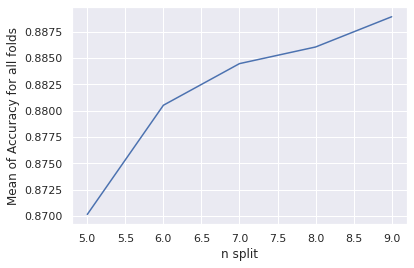

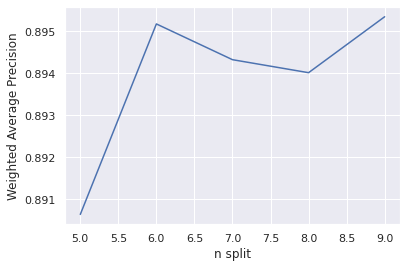

In [127]:
from sklearn.pipeline import make_pipeline
acc = []
precisions=[]
for n in range(5,10):
    
    pipe = make_pipeline(StandardScaler(), RidgeClassifier())

    # Note the results will vary each run since we take a different
    # subset of the data each time (since shuffle=True)
    scores = np.mean(cross_val_score(pipe, X, y, cv=n, scoring='accuracy'))
    acc.append(scores)
    p= np.mean(cross_val_score(pipe, X, y, cv=n, scoring=metrics.make_scorer(metrics.precision_score, average='weighted')))
    precisions.append(p)
    print('Mean of Accuracy for all ', str(n), ' folds: ', 'Scores: ', scores)
    print('Mean of Precision ', str(n), ' folds: ', 'Precision: ', p)

# plot to see clearly
plt.plot(range(5,10), acc)
plt.xlabel('n split')
plt.ylabel('Mean of Accuracy for all folds')
plt.show();
plt.plot(range(5,10), precisions)
plt.xlabel('n split')
plt.ylabel('Weighted Average Precision')
plt.show();

0.308515274444493

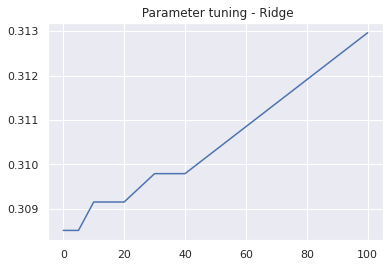

In [128]:
# Parameter Tuning with ridge error
def rmse_ridge(ridge_model):
    ridge_model.fit(X_train, y_train)
    ridge_pre = ridge_model.predict(X_test)
    squared = np.square(ridge_pre-y_test)
    ridge_error = np.sqrt(np.sum(squared)/len(y_test))
    return(ridge_error)

alphas = [0.01, 0.02, 0.1, 0.3, 1, 3, 5, 10, 20, 30,40,100]
cv_ridge = [rmse_ridge(RidgeClassifier(alpha = alpha )).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Parameter tuning - Ridge")
cv_ridge.min()

In [130]:
import joblib
joblib.parallel_backend('threading')
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

pipe=make_pipeline(StandardScaler(),RidgeClassifier()) #, class_weight='balanced'

grid_search = GridSearchCV(
    pipe, 
    {'ridgeclassifier__alpha': range(0,100)},  # Tried [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 100] as well
    cv=StratifiedKFold(10, random_state=10, shuffle=True),
    scoring=metrics.make_scorer(metrics.recall_score), # maximise recall to minimise FN
    return_train_score=True,
    n_jobs=-1,
    verbose=3)

#X_sc = scaler.transform(X)  # can use this if I don't use pipe
grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ridgeclassifier__alpha=0;, score=(train=0.459, test=0.534) total time=   0.1s
[CV 2/10] END ridgeclassifier__alpha=0;, score=(train=0.462, test=0.454) total time=   0.1s
[CV 3/10] END ridgeclassifier__alpha=0;, score=(train=0.461, test=0.521) total time=   0.1s
[CV 4/10] END ridgeclassifier__alpha=0;, score=(train=0.469, test=0.417) total time=   0.1s
[CV 5/10] END ridgeclassifier__alpha=0;, score=(train=0.467, test=0.417) total time=   0.2s
[CV 6/10] END ridgeclassifier__alpha=0;, score=(train=0.462, test=0.472) total time=   0.1s
[CV 8/10] END ridgeclassifier__alpha=0;, score=(train=0.463, test=0.444) total time=   0.1s
[CV 7/10] END ridgeclassifier__alpha=0;, score=(train=0.466, test=0.460) total time=   0.1s
[CV 9/10] END ridgeclassifier__alpha=0;, score=(train=0.467, test=0.438) total time=   0.1s
[CV 10/10] END ridgeclassifier__alpha=0;, score=(train=0.464, test=0.457) total time=   0.1s
[CV 1/10] END 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=1))])

1: Maximize recall: best value found in alpha = 0
2: Maximize precision: best value found in alpha = 97
3: Maximize accuracy: best value found in alpha = 5
Let's run the model with those alphas to see if we going to get any better recall, precision or accuracy.

In [131]:
df

,churn,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,4,39,5,1,3,12691.0,777,...,1,0,0,0,1,0,0,0,0,0
1,0,49,5,1,44,6,1,2,8256.0,864,...,0,0,0,0,0,1,0,0,0,0
2,0,51,3,3,36,4,1,0,3418.0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,1,34,3,4,1,3313.0,2517,...,1,0,0,0,0,0,1,0,0,0
4,0,40,3,4,21,5,1,0,4716.0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,2,40,3,2,3,4003.0,1851,...,0,0,0,0,0,1,0,0,0,0
10123,1,41,2,2,25,4,2,3,4277.0,2186,...,0,0,0,1,0,0,0,0,0,0
10124,1,44,1,1,36,5,3,4,5409.0,0,...,1,0,0,0,1,0,0,0,0,0
10125,1,30,2,2,36,4,3,3,5281.0,0,...,0,0,0,0,0,0,1,0,0,0


In [132]:
# set x and y
X = df.drop('churn', axis = 1)
y = df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge with alpha = 0
ridge = RidgeClassifier(alpha=0) #, class_weight='balanced'
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=0)

In [134]:
print('Train Accuracy :',ridge.score(X_train, y_train))
print('Test Accuracy: ',ridge.score(X_test, y_test))

Train Accuracy : 0.8987491770901909
Test Accuracy:  0.9048183254344392


In [135]:
confisuon_matrix_summary_ridge(y_test, ridge)

,pred neg,pred pos
actual neg,2098,27
actual pos,214,193


Classification treshold is 0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.4742014742014742
False Positive Rate = FP/(FP+TN) : 0.012705882352941176
Accuracy = (TP+TN)/total : 0.9048183254344392
Precision = TP/(TP+FP) : 0.8772727272727273


In [136]:
y_pred = ridge.predict(X_test)
verify_performance(y_test, y_pred, ridge)

Weighted Average Precision: 0.9026


,0,1
individual precision,0.99,0.47


,0,1
0,0.99,0.01
1,0.53,0.47


In [137]:
# set x and y
X =  df.drop('churn', axis = 1)
y =  df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge with alpha = 0
ridge = RidgeClassifier(alpha=0, class_weight='balanced')
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=0, class_weight='balanced')

In [138]:
print('Train Accuracy :',ridge.score(X_train, y_train))
print('Test Accuracy: ',ridge.score(X_test, y_test))

Train Accuracy : 0.8500329163923634
Test Accuracy:  0.8380726698262243


In [139]:
confisuon_matrix_summary_ridge(y_test, ridge)

,pred neg,pred pos
actual neg,1780,345
actual pos,65,342


Classification treshold is 0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8402948402948403
False Positive Rate = FP/(FP+TN) : 0.1623529411764706
Accuracy = (TP+TN)/total : 0.8380726698262243
Precision = TP/(TP+FP) : 0.4978165938864629


In [140]:
y_pred = ridge.predict(X_test)
verify_performance(y_test, y_pred, ridge)

Weighted Average Precision: 0.8897


,0,1
individual precision,0.84,0.84


,0,1
0,0.84,0.16
1,0.16,0.84


We didn't get better recall value, actualy it was worse than previous logistic regression model(recall was 0.5773 in logreg) and now we got 0.4742 recall with ridge. Let's look at another model!

KNN Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# set x and y
X = df.drop('churn', axis = 1)
y = df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [143]:
print('Train Accuracy :',knn.score(X_train, y_train))
print('Test Accuracy: ',knn.score(X_test, y_test))

Train Accuracy : 0.8886109282422646
Test Accuracy:  0.877172195892575


In [144]:
most_freq_class = y_train.value_counts().index[0]
#Compute null accuracy.
y_test.value_counts()[most_freq_class] / len(y_test)

0.8392575039494471

In [145]:
confisuon_matrix_summary(y_test, knn, 0.5)

,pred neg,pred pos
actual neg,2110,15
actual pos,296,111


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.2727272727272727
False Positive Rate = FP/(FP+TN) : 0.007058823529411765
Accuracy = (TP+TN)/total : 0.877172195892575
Precision = TP/(TP+FP) : 0.8809523809523809


In [146]:
knn_pred_proba = knn.predict_proba(X_test)[:,1]
verify_performance(y_test, knn_pred_proba > .5, knn)

Weighted Average Precision: 0.8776


,0,1
individual precision,0.99,0.27


,0,1
0,0.99,0.01
1,0.73,0.27


In [147]:
scores = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    # Score with accuracy
    score = float(sum(pred == y_test)) / len(y_test)
    scores.append([k, score])

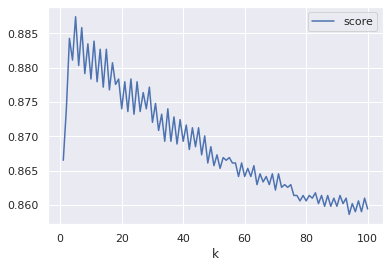

In [148]:
#maximize accuracy
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

Maximize accuracy: best value found in k=5

In [149]:
scores = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    # Score with precision
    score = metrics.precision_score(y_test,knn.predict(X_test))
    scores.append([k, score])

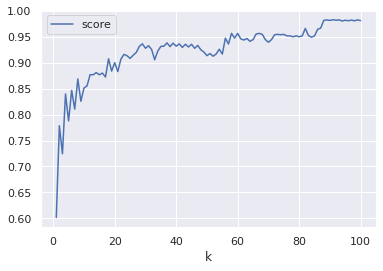

In [150]:
#miximize precision
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

Maximize precision: best value found in k=99

In [152]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [154]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
data = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
data.head()

,training error,testing error
K,,
100,0.137591,0.140600
99,0.137064,0.139021
98,0.137854,0.140995
97,0.136801,0.139415
96,0.137591,0.140995


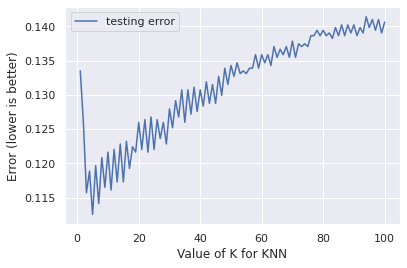

In [155]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
# Best k number is where Testing error is min
data.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');


In [156]:
min(list(zip(testing_error, k_range)))

(0.11255924170616116, 5)

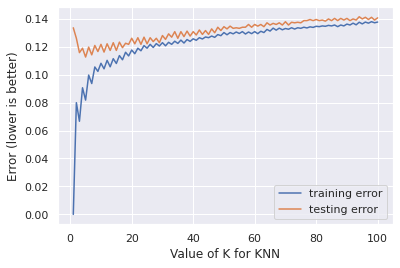

In [157]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
data.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

Training error decreases as model complexity increases (lower value of K).

 



Testing error is minimized at the optimum model complexity.

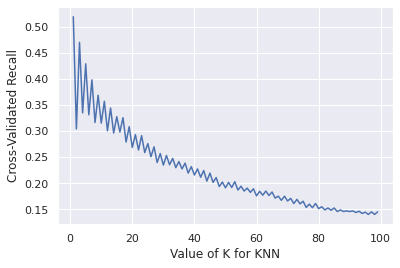

In [158]:
from sklearn.pipeline import make_pipeline
k_scores = []

# choose k between 1 to 49, step 2 to get odds
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    pipe = make_pipeline(StandardScaler(), knn)
    cv=StratifiedKFold(5, random_state=10, shuffle=True)
    scores = cross_val_score(pipe, X, y, cv=cv, scoring=metrics.make_scorer(metrics.recall_score)) #scoring=metrics.make_scorer(metrics.precision_score)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(range(1, 100), k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Recall')
plt.show();

In [159]:
max_acc = max(k_scores)
for i, acc in zip(range(1, 100), k_scores):
    if acc == max_acc:
        print('k: ', i)
        print('max_recall: ', acc)

k:  1
max_recall:  0.5193732892873996


1: Maximize recall: scoring=metrics.make_scorer(metrics.recall_score) best value found in k=1

2: Maximize precision: scoring=metrics.make_scorer(metrics.precision_score) best value found in k=99

3: Maximize accuracy: scoring='accuracy' best value found in k=5 and 7

Now built the model with k=1 to find best recall for KNN.

In [161]:
# set x and y
X =  df.drop('churn', axis = 1)
y =  df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [162]:
print('Train Accuracy :',knn.score(X_train, y_train))
print('Test Accuracy: ',knn.score(X_test, y_test))

Train Accuracy : 1.0
Test Accuracy:  0.8665086887835703


In [163]:
confisuon_matrix_summary(y_test, knn, 0.5)

,pred neg,pred pos
actual neg,1990,135
actual pos,203,204


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.5012285012285013
False Positive Rate = FP/(FP+TN) : 0.06352941176470588
Accuracy = (TP+TN)/total : 0.8665086887835703
Precision = TP/(TP+FP) : 0.6017699115044248


In [164]:
knn_pred_proba = knn.predict_proba(X_test)[:,1]
verify_performance(y_test, knn_pred_proba > .5, knn)

Weighted Average Precision: 0.8583


,0,1
individual precision,0.94,0.5


,0,1
0,0.94,0.06
1,0.50,0.50


0.5012 is not what we are looking for, I believe we can find better recall! Let's look at another model!

Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

# set x and y
X =  df.drop('churn', axis = 1)
y =  df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [166]:
print('Train Accuracy :',metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ',metrics.accuracy_score(y_test, rfc.predict(X_test)))

Train Accuracy : 1.0
Test Accuracy:  0.9620853080568721


 It did overfit, but good new is test set prediction doesn't look bad at all!

In [167]:
confisuon_matrix_summary(y_test, rfc, 0.5)

,pred neg,pred pos
actual neg,2101,24
actual pos,72,335


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8230958230958231
False Positive Rate = FP/(FP+TN) : 0.011294117647058824
Accuracy = (TP+TN)/total : 0.9620853080568721
Precision = TP/(TP+FP) : 0.9331476323119777


In [168]:
rfc_pred_proba = rfc.predict_proba(X_test)[:,1]
verify_performance(y_test, rfc_pred_proba > .5, rfc)

Weighted Average Precision: 0.9614


,0,1
individual precision,0.99,0.82


,0,1
0,0.99,0.01
1,0.18,0.82


we are getting somewhere! Recall is 0.823 yeey! Let's tune this bad boi and see if we can increase this!

In [169]:
n_estimators = [100, 200, 300]
max_depth = [5, 10,  25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]
#ccp_alpha = [0, 0.01, 0.1, 1]

hyperF = dict(n_estimators = n_estimators, 
              max_depth = max_depth, 
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)
             # ccp_alpha = ccp_alpha)

grid_search = GridSearchCV(RandomForestClassifier(), 
                           hyperF, 
                           cv=StratifiedKFold(5, random_state=10, shuffle=True),
                           scoring=metrics.make_scorer(metrics.recall_score),
                           verbose = 3, 
                           n_jobs = -1)

grid_search.fit(X, y)
grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.463 total time=   1.3s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.552 total time=   1.4s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.520 total time=   1.3s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.560 total time=   1.3s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.526 total time=   1.3s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.564 total time=   2.5s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.469 total time=   2.6s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.498 total time=   2.5s
[

RandomForestClassifier(max_depth=25, n_estimators=300)

In [170]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=300)

Let's try out new model with better parameters to get better recall score.

In [171]:
from sklearn.ensemble import RandomForestClassifier

# set x and y
X =  df.drop('churn', axis = 1)
y =  df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

#Create a Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=200, 
                           max_depth=25, 
                          # min_samples_leaf=5, 
                           min_samples_split=5, 
                           random_state = 42)

#Train the model using the training sets 
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [172]:
print('Train Accuracy :',metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ',metrics.accuracy_score(y_test, rfc.predict(X_test)))

Train Accuracy : 0.9984200131665569
Test Accuracy:  0.9656398104265402


In [173]:
confisuon_matrix_summary(y_test, rfc, 0.5)

,pred neg,pred pos
actual neg,2103,22
actual pos,65,342


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8402948402948403
False Positive Rate = FP/(FP+TN) : 0.010352941176470589
Accuracy = (TP+TN)/total : 0.9656398104265402
Precision = TP/(TP+FP) : 0.9395604395604396


In [174]:
print('Train Accuracy :',metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy: ',metrics.accuracy_score(y_test, rfc.predict(X_test)))

Train Accuracy : 0.9984200131665569
Test Accuracy:  0.9656398104265402


In [175]:
confisuon_matrix_summary(y_test, rfc, 0.5)

,pred neg,pred pos
actual neg,2103,22
actual pos,65,342


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8402948402948403
False Positive Rate = FP/(FP+TN) : 0.010352941176470589
Accuracy = (TP+TN)/total : 0.9656398104265402
Precision = TP/(TP+FP) : 0.9395604395604396


In [176]:
rfc_pred_proba = rfc.predict_proba(X_test)[:,1]
verify_performance(y_test, rfc_pred_proba > .5, rfc)

Weighted Average Precision: 0.9651


,0,1
individual precision,0.99,0.84


,0,1
0,0.99,0.01
1,0.16,0.84


0.84 recall score and 0.9395 precison and 0.9656 accuracy is pretty good!

But almost there, lastly I want to try it with  XGBoost!

XGBoost

In [177]:
import xgboost as xgb

# set x and y
X =  df.drop('churn', axis = 1)
y =  df['churn']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, stratify=y)

# Create xgboost model
m_xgb = xgb.XGBClassifier(n_estimators=200,
                       max_depth=2, random_state=42)

#Train the model using the training sets
m_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=2, n_estimators=200, random_state=42)

In [178]:
print('Train Accuracy :',metrics.accuracy_score(y_train, m_xgb.predict(X_train)))
print('Test Accuracy: ',metrics.accuracy_score(y_test, m_xgb.predict(X_test)))

Train Accuracy : 0.972218564845293
Test Accuracy:  0.9703791469194313


In [179]:
confisuon_matrix_summary(y_test, m_xgb, 0.5)

,pred neg,pred pos
actual neg,2104,21
actual pos,54,353


Classification treshold is  0.5
True Positive Rate/Recall = TP/(TP+FN) : 0.8673218673218673
False Positive Rate = FP/(FP+TN) : 0.00988235294117647
Accuracy = (TP+TN)/total : 0.9703791469194313
Precision = TP/(TP+FP) : 0.9438502673796791


In [180]:
xgb_pred_proba = m_xgb.predict_proba(X_test)[:,1]
verify_performance(y_test, xgb_pred_proba > .5, rfc)

Weighted Average Precision: 0.9700


,0,1
individual precision,0.99,0.87


,0,1
0,0.99,0.01
1,0.13,0.87


We got this! Recall: 0.9164, Precision: 0.9395, Accuracy: 0.9770 is pretty good model! 

Logistic Regresion:

Recall: 0.5773
Precison Score: 0.7669
Accuracy: 0.9040
Ridge Classifier:

Recall: 0.4742
Precison Score: 0.8772
Accuracy: 0.9048
KNN:

Recall: 0.5012
Precison : 0.6017
Accuracy: 0.8665
Random Forest:

Recall: 0.8402
Precison : 0.9395
Accuracy: 0.9656
XGBoost:

Recall: 0.9164
Precison : 0.9395
Accuracy: 0.9770